In this notebook, we download the weather data (FL LAUDERDALE BEACH) from https://climatecenter.fsu.edu/climate-data-access-tools/downloadable-data and save as "weatherdata.txt". Then, using time series analysis to predict the weather. 

In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('weatherdata.txt', delimiter = ",")
df.replace(' ', np.nan, inplace=True)
df

,COOPID,YEAR,MONTH,DAY,PRECIPITATION,MAX TEMP,MIN TEMP,MEAN TEMP
0,83168,1952,1,1,-99.99,-99.9,-99.9,-99.90000
1,83168,1952,1,2,-99.99,-99.9,-99.9,-99.90000
2,83168,1952,1,3,-99.99,-99.9,-99.9,-99.90000
3,83168,1952,1,4,-99.99,-99.9,-99.9,-99.90000
4,83168,1952,1,5,-99.99,-99.9,-99.9,-99.90000
5,83168,1952,1,6,-99.99,-99.9,-99.9,-99.90000
6,83168,1952,1,7,-99.99,-99.9,-99.9,-99.90000
7,83168,1952,1,8,-99.99,-99.9,-99.9,-99.90000
8,83168,1952,1,9,-99.99,-99.9,-99.9,-99.90000
9,83168,1952,1,10,-99.99,-99.9,-99.9,-99.90000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24153 entries, 0 to 24152
Data columns (total 8 columns):
COOPID            24153 non-null int64
 YEAR             24153 non-null int64
 MONTH            24153 non-null int64
 DAY              24153 non-null int64
 PRECIPITATION    24153 non-null float64
 MAX TEMP         24153 non-null float64
 MIN TEMP         24153 non-null float64
 MEAN TEMP        23422 non-null object
dtypes: float64(3), int64(4), object(1)
memory usage: 1.5+ MB


In [4]:
df.count()

COOPID            24153
 YEAR             24153
 MONTH            24153
 DAY              24153
 PRECIPITATION    24153
 MAX TEMP         24153
 MIN TEMP         24153
 MEAN TEMP        23422
dtype: int64

From the above two commands, we can see there are some NULL value in Mean Temp (23422 vs. 24513).  Note that the column index for " YEAR", " MONTH"... has an extra space in it. Since " MEAN TEMP" has NAN value in it, we need to first drop this NA to plot it. 

<IPython.core.display.Javascript object>


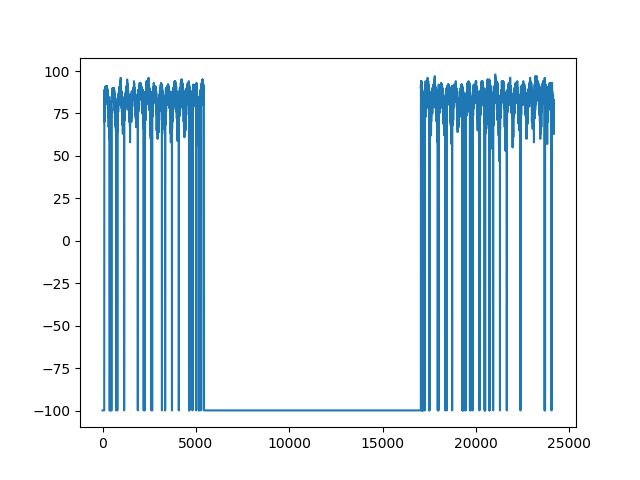

In [5]:
plt.plot(df[" MAX TEMP"])
plt.show()

In [6]:
df = df.where(df!=-99.99, np.nan)

In [7]:
df = df.where(df!=-99.9, np.nan)

In [8]:
df = df.where(df!=' -99.90000', np.nan)

In [9]:
maxtemp = df[" MAX TEMP"]
len = int(maxtemp.size/2)
print(len)
maxtemp = maxtemp[len:]

12076


<IPython.core.display.Javascript object>


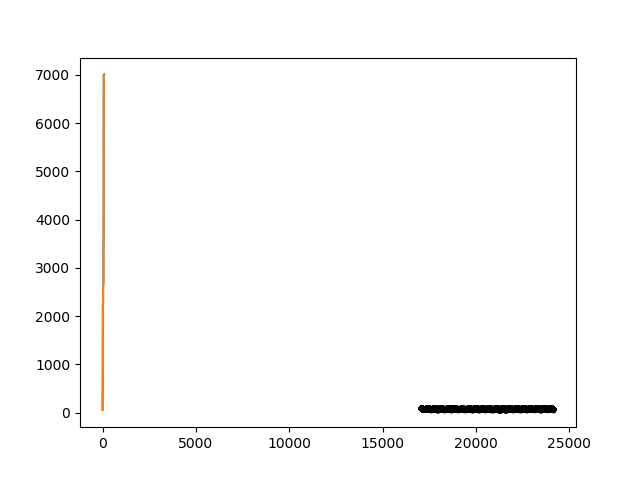

In [10]:
plt.figure()
plt.plot(maxtemp, color='black', marker='.', linestyle='none')
plt.show()

one way to remove na is using pandas series processing (first find the starting row of nan). The other approach is usin numpy

In [11]:
#nonnan_rows = maxtemp[maxtemp.notna()]
#idx = nonnan_rows.iloc[:1].index
#start_nonnan_row_maxtemp = idx[0] - len
#print(start_nonnan_row_maxtemp)
#maxtemp = maxtemp[start_nonnan_row_maxtemp:]

In [13]:
maxtemp_array = maxtemp.values

In [16]:
# remove all the nans.
# trim both ends and fill nans in the middle.
# find the first non-nan.
print(np.where(np.isnan(maxtemp_array))[0])

[    0     1     2 ... 11978 11979 11980]


In [20]:
print(np.where(np.logical_not(np.isnan(maxtemp_array)))[0])

[ 4973  4974  4975 ... 12074 12075 12076]


In [22]:
i_start = np.where(np.logical_not(np.isnan(maxtemp_array)))[0][0]
print(i_start)

4973


In [23]:
#trim the start nan.
maxtemp_array = maxtemp_array[i_start:]

In [25]:
# now check again where the nans are.
print(np.where(np.isnan(maxtemp_array))[0])

[  62   69   73   83   91  157  212  441  442  443  456  457  905  944
 1310 1383 1387 1676 2229 2230 2231 2232 2235 2236 2252 2253 2254 2255
 2328 2329 2408 2630 2646 2647 2648 2649 2650 2651 2652 2653 2654 2655
 2656 2657 2658 2659 2774 3140 3423 3424 3429 3439 3440 3444 3669 3677
 3678 3680 3681 3872 4238 4604 5336 6630 6631 6652 6988 6989 6990 6991
 6992 6993 6994 6995 6996 6997 6998 6999 7000 7001 7002 7003 7004 7005
 7006 7007]


In [27]:
maxtemp_array.size

7104

In [29]:
maxtemp_array.shape

(7104,)

In [34]:
i_nans = np.where(np.isnan(maxtemp_array))[0]
i_nans

array([  62,   69,   73,   83,   91,  157,  212,  441,  442,  443,  456,
        457,  905,  944, 1310, 1383, 1387, 1676, 2229, 2230, 2231, 2232,
       2235, 2236, 2252, 2253, 2254, 2255, 2328, 2329, 2408, 2630, 2646,
       2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657,
       2658, 2659, 2774, 3140, 3423, 3424, 3429, 3439, 3440, 3444, 3669,
       3677, 3678, 3680, 3681, 3872, 4238, 4604, 5336, 6630, 6631, 6652,
       6988, 6989, 6990, 6991, 6992, 6993, 6994, 6995, 6996, 6997, 6998,
       6999, 7000, 7001, 7002, 7003, 7004, 7005, 7006, 7007], dtype=int64)

In [36]:
# not much pattern observed on nan index.
# check whether any pattern with difference on the nan index.
print(np.diff(i_nans))

[   7    4   10    8   66   55  229    1    1   13    1  448   39  366
   73    4  289  553    1    1    1    3    1   16    1    1    1   73
    1   79  222   16    1    1    1    1    1    1    1    1    1    1
    1    1    1  115  366  283    1    5   10    1    4  225    8    1
    2    1  191  366  366  732 1294    1   21  336    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1]


In [38]:
# In genearl, there are two ways to deal with missing data. One is to ignore these missing data while the other is to replace the missing data with some known data.
# As this is time series analysis, we cannot ignore the missing data. Instead, as the temprature in nearby dates are close to each other, we will replace the missing data with the nearby non-nan data.
for i in range(maxtemp_array.size):
    if (np.isnan(maxtemp_array[i])):
        maxtemp_array[i] = maxtemp_array[i-1]        

In [39]:
print(np.where(np.isnan(maxtemp_array))[0]) #double check whether all nan values has been replaced.

[]


<IPython.core.display.Javascript object>


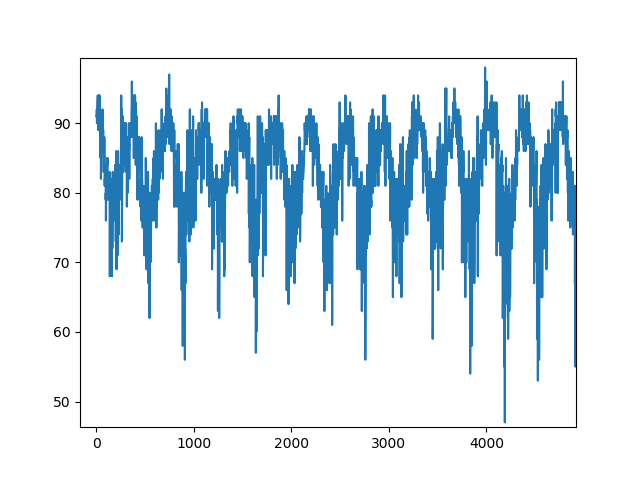

In [40]:
plt.figure()
plt.plot(maxtemp_array)
plt.show()